In [43]:
import pandas as pd
import numpy as np
import os
from sklearn.feature_extraction.text import TfidfTransformer
import implicit
from sklearn.cluster import KMeans

from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [45]:
data_path = '/disk/ru'

In [3]:
# streams = pd.read_json('/disk/ru/streams', lines=True)
streams = pd.read_csv('/disk/ru/prep.csv')

In [4]:
streams.head()

,device_type,length,os,timestamp,track_id,user_id,delta
0,desktop,254,Linux,2017-09-09,2318538f5412b3e87cf335fb667c0e7f121ae830,bab3607bf601e7e681012f206b62b4b39ee7023c,NaN
1,mobile,179,iOS,2017-09-09,dc1dd219d560a964281d777ad34a62af288a1de8,2622b170e9ddcb7d05946e914ad6fe61cee6ea63,NaN
2,mobile,242,Android,2017-09-09,d6aa6ac360c555ef96830404a0b66cc2a4d6fb8d,637d4c31a14e65cf77a6bd75a2aa605e8655b244,NaN
3,mobile,214,iOS,2017-09-09,c0dd8f4afbd640483b2746bc7287a52383e63b72,885085495b80cb431f149b3d82fb4bcc44ea7469,NaN
4,mobile,249,Android,2017-09-09,212eebd1e92303a5e0c43141561a724d3b47b549,5e94bc2ccd18805ba6b1747cc5d3260020425b00,NaN


In [5]:
streams['timestamp'] = pd.to_datetime(streams['timestamp'], format='%Y-%m-%d %H:%M:%S')

In [6]:
def form_UIMatrix(data, user = 'user', item = 'item'):
    from sklearn.feature_extraction.text import CountVectorizer
    vectorizer = CountVectorizer()
    # behavior_series = [['item item item'], (user1)
    #                    ['item item item']...] (user2)
    {user : [item, item, item....]}
    behavior_series = data.groupby(user)[item].apply(lambda x: ' '.join(x))
    counts = vectorizer.fit_transform(behavior_series)
    return counts

In [7]:
track_M = form_UIMatrix(streams, item='track_id', user='user_id')

In [8]:
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(track_M)

In [32]:
# Load abnormal user
ab_user = pd.read_csv('/disk/ru/abnormal_user.csv', header=None, names=['user_id'])
ext_id = streams.groupby(['user_id'])['track_id'].size()
ext_id = ext_id.reset_index()

ab_idx = ext_id.loc[ext_id['user_id'].isin(np.squeeze(ab_user.values))].index

In [20]:
kmeans3 = KMeans(n_clusters=30, n_jobs=20).fit(tfidf2)

In [21]:
from sklearn.decomposition import TruncatedSVD
reduced_data = TruncatedSVD(n_components=2).fit_transform(tfidf2)

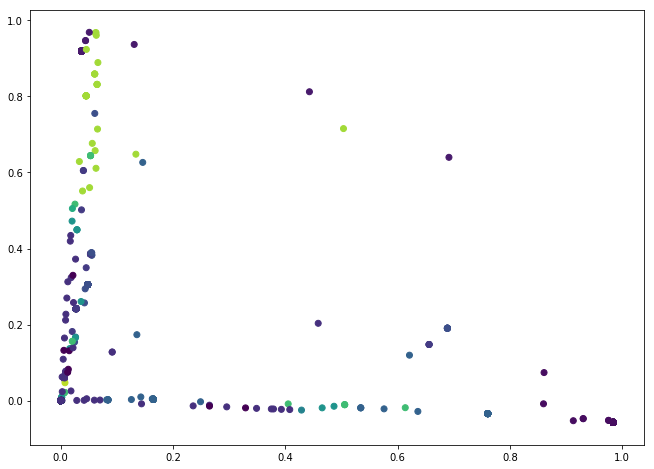

In [63]:
# 80M data points is not efficient for scatter plot, so sample!!
norm_idx = np.random.randint(low=0, high=tfidf2.shape[0], size=2800)
abnorm_idx = np.random.choice(ab_idx, 200)
idx = np.append(norm_idx, abnorm_idx)


plt.figure(figsize=(11, 8))
plt.scatter(reduced_data[idx, 0], reduced_data[idx, 1], c=kmeans3.labels_[idx])

plt.show()

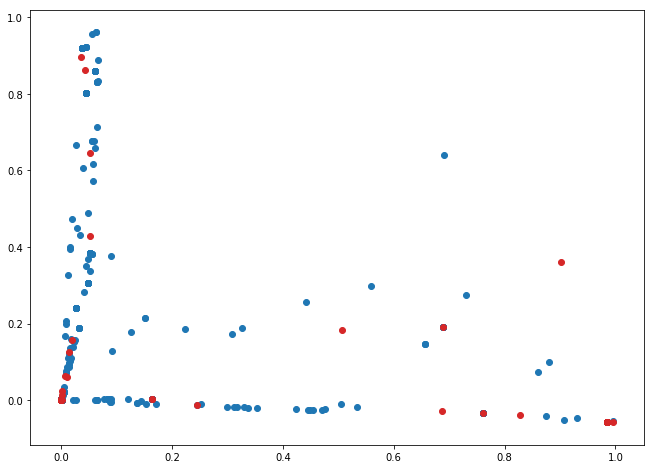

In [35]:
import seaborn as sns
colors = sns.color_palette()

plt.figure(figsize=(11, 8))
plt.scatter(reduced_data[norm_idx, 0], reduced_data[norm_idx, 1], c=colors[0])
plt.scatter(reduced_data[abnorm_idx, 0], reduced_data[abnorm_idx, 1], c=colors[3])

plt.show()

In [36]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=5)

result_tsne_2 = tsne.fit_transform(tfidf2[idx,:].toarray())

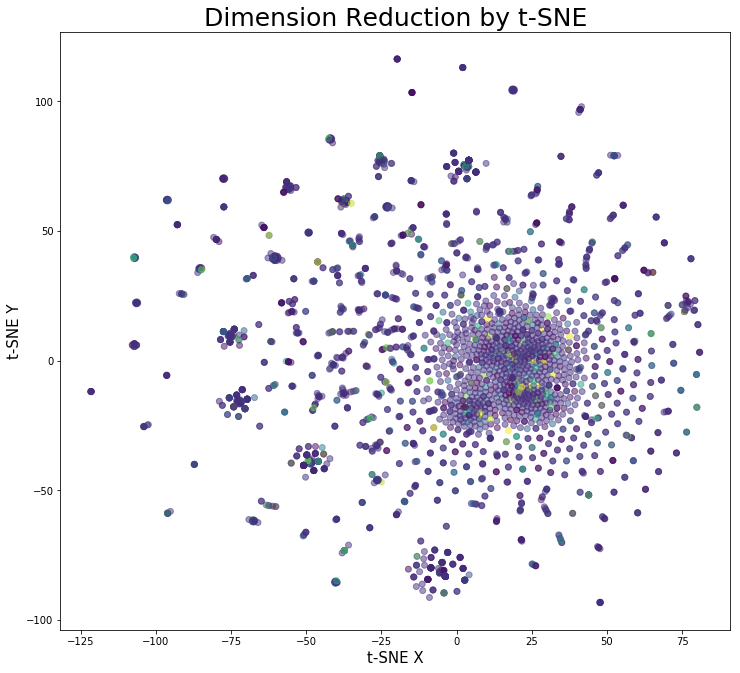

In [67]:
plt.figure(figsize=(12,11))
plt.scatter(result_tsne_2[:, 0], result_tsne_2[:, 1], c=kmeans3.labels_[idx], alpha=.5)

plt.title('Dimension Reduction by t-SNE', fontsize=25)
plt.xlabel('t-SNE X', fontsize=15)
plt.ylabel('t-SNE Y', fontsize=15)
plt.show()

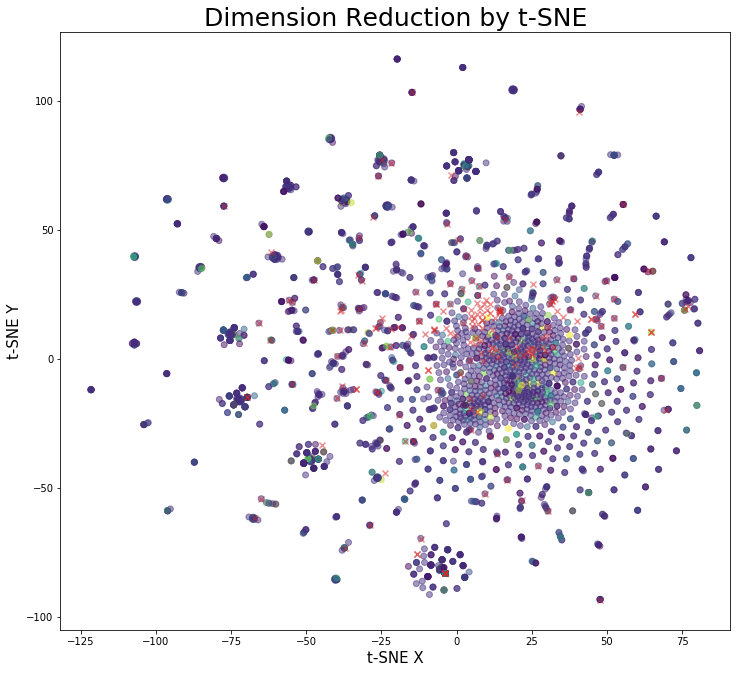

In [68]:
plt.figure(figsize=(12,11))
plt.scatter(result_tsne_2[:len(norm_idx), 0], result_tsne_2[:len(norm_idx), 1], c=kmeans3.labels_[norm_idx], alpha=.5)
plt.scatter(result_tsne_2[len(norm_idx):, 0], result_tsne_2[len(norm_idx):, 1], c=colors[3], alpha=.5,marker='x')

plt.title('Dimension Reduction by t-SNE', fontsize=25)
plt.xlabel('t-SNE X', fontsize=15)
plt.ylabel('t-SNE Y', fontsize=15)
plt.show()

In [60]:
model = implicit.als.AlternatingLeastSquares(factors=50)
model.fit(tfidf.T) # item_user matrix
df = pd.DataFrame(data=model.user_factors)
df['user_id'] = np.sort(streams['user_id'].unique())
df.to_csv(os.path.join(data_path, 'user_item'),index=False)

## outlier

In [ ]:
fraud = streams.loc[streams['timestamp'].isin(outlier)]
norm = streams.loc[~streams['timestamp'].isin(outlier)]

In [ ]:
user_upload = fraud['user_id'].value_counts()

In [ ]:
user_upload.describe()

In [ ]:
streams[streams['user_id']=='89acdddf6f62acfeb3ea509e2b8a8a6825f58f06'].groupby('timestamp').size()

In [ ]:
streams[streams['user_id']=='4df09e29ac34bdb047d96d7e8bd1e3d35139cd05'].groupby('timestamp').size()

In [ ]:
streams[streams['user_id']=='e6512df27c6c99489a2eaa3f7ebd5e34a4f53cc4'].groupby('timestamp').size()

In [ ]:
streams[streams['user_id']=='92bfef6b5cd723ba53edcb55d450256f20463985'].groupby('timestamp').size()

In [ ]:
streams[streams['user_id']=='b96edaf7f1f6e89d5a8765401378ace681fd0586'].groupby('timestamp').size()

In [ ]:
streams[streams['user_id']=='dc061bbf49b01ca639ef2a6700f6a5d7130ddbb0'].groupby('timestamp').size()